##Data Collection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sentiment_analysis_Tokopedia.xlsx to Sentiment_analysis_Tokopedia (3).xlsx


In [ ]:
df = pd.read_excel("Sentiment_analysis_Tokopedia.xlsx")
df.head()


,Unnamed: 0,Nama_Produk,Akun,Ulasan_clean,label
0,1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,dua kali beli sayang lambat respon order pagi ...,0
1,2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus kirim cepat,1
2,3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesan,1
3,4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,panas pakai,1
4,5,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai minta bagus komunikasi jual beli...,0


##Explanatory Data analysis

In [ ]:
df.shape

(580, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    580 non-null    int64 
 1   Nama_Produk   580 non-null    object
 2   Akun          580 non-null    object
 3   Ulasan_clean  580 non-null    object
 4   label         580 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 22.8+ KB


In [ ]:
df.describe()

,Unnamed: 0,label
count,580.000000,580.000000
mean,290.500000,0.465517
std,167.575853,0.499240
min,1.000000,0.000000
25%,145.750000,0.000000
50%,290.500000,0.000000
75%,435.250000,1.000000
max,580.000000,1.000000


Melakukan pengecekan apakah terdapat data yang hilang atau tidak

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Nama_Produk,0
Akun,0
Ulasan_clean,0
label,0


##Data Prepocessing

Menghapus kolom yang tidak digunakan,yaitu menghapus kolom Unnamed: 0,Nama_produk,dan juga Akun

In [ ]:
df.drop(columns=['Unnamed: 0', 'Nama_Produk', 'Akun'], inplace=True)
df.head()

,Ulasan_clean,label
0,dua kali beli sayang lambat respon order pagi ...,0
1,bagus kirim cepat,1
2,barang sesuai pesan,1
3,panas pakai,1
4,barang sesuai minta bagus komunikasi jual beli...,0


Melihat distribusi label (positif dan negatif)

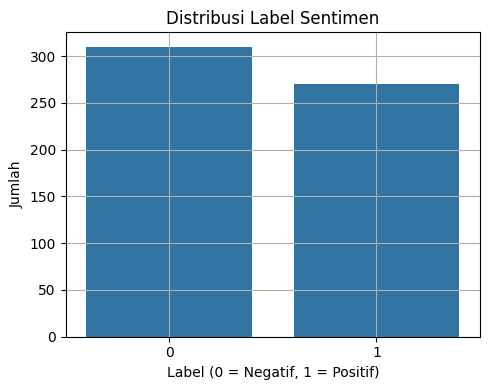

,count
label,
0,310
1,270


In [ ]:
# Cek distribusi label
label_counts = df['label'].value_counts()

# Tampilkan jumlah data dan distribusi label
data_info = {
    'Jumlah Data': len(df),
    'Distribusi Label': label_counts.to_dict()
}

# Visualisasi distribusi label
plt.figure(figsize=(5, 4))
sns.countplot(x='label', data=df)
plt.title('Distribusi Label Sentimen')
plt.xlabel('Label (0 = Negatif, 1 = Positif)')
plt.ylabel('Jumlah')
plt.grid(True)
plt.tight_layout()
plt.show()

df['label'].value_counts()

**Dari grafik di atas terlihat bahwa:**

Data dengan label postif sebanyak 270 data dan 310 data label negatif

**Menghapus stopwords dan membersihkan data**

menghilangkan kata hubung (stopwords) dan juga membersihkan teks dari tanda baca dan karakter yang kurang penting agar hasil teks lebih bersih dan fokus ke kata-kata penting saja.

In [ ]:
stopwords_id = {
    'yang', 'untuk', 'dan', 'di', 'ke', 'dari', 'ini', 'itu', 'dengan', 'karena',
    'pada', 'saya', 'ada', 'tidak', 'bisa', 'jadi', 'sudah', 'akan', 'kalau',
    'dalam', 'adalah', 'atau', 'lebih', 'juga', 'oleh', 'sebagai'
}

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords_id]
    return ' '.join(tokens)

df['Ulasan_clean'] = df['Ulasan_clean'].apply(clean_text)

**Menghapus duplicate space**

In [ ]:
def rewhitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

df['Ulasan_clean'] = df['Ulasan_clean'].apply(rewhitespace)
df.head()

,Ulasan_clean,label
0,dua kali beli sayang lambat respon order pagi ...,0
1,bagus kirim cepat,1
2,barang sesuai pesan,1
3,panas pakai,1
4,barang sesuai minta bagus komunikasi jual beli...,0


**Melakukan Tokenization**

Melakukan Tokenization yaitu memecah Teks menjadi kata kata agar tiap elemen dapat di analisis

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

def token(text):
  text = word_tokenize(text)
  return text

df['Ulasan_clean'] = df['Ulasan_clean'].apply(token)
df.head()

,Ulasan_clean,label
0,"[dua, kali, beli, sayang, lambat, respon, orde...",0
1,"[bagus, kirim, cepat]",1
2,"[barang, sesuai, pesan]",1
3,"[panas, pakai]",1
4,"[barang, sesuai, minta, bagus, komunikasi, jua...",0


**Melakukan Lemization**

Melakukan Lemization yaitu untuk Menghapus imbuhan

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_review(Ulasan_clean):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in Ulasan_clean]

df['Ulasan_clean'] = df['Ulasan_clean'].apply(lemmatize_review)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Ulasan_clean,label
0,"[dua, kali, beli, sayang, lambat, respon, orde...",0
1,"[bagus, kirim, cepat]",1
2,"[barang, sesuai, pesan]",1
3,"[panas, pakai]",1
4,"[barang, sesuai, minta, bagus, komunikasi, jua...",0


**Melakukan steamming**

Mengubah kata ke bentuk dasar,setalah melakukan steammer,saya melakukan penggabungan teks menjadi satu kesatuan di karenakan TF-IDF memerlukan format dalam bentuk string

In [ ]:
  from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_review(Ulasan_clean):
    return ' '.join([stemmer.stem(word) for word in Ulasan_clean])

df['Ulasan_clean'] = df['Ulasan_clean'].apply(stem_review)
df.head()

,Ulasan_clean,label
0,dua kali beli sayang lambat respon order pagi ...,0
1,bagus kirim cepat,1
2,barang sesuai pesan,1
3,panas pakai,1
4,barang sesuai minta bagus komunikasi jual beli...,0


##Model Training

**Melakukan TF-IDF**

dimana Kalimat yang terdapat dalam kolom Ulasan_clean akan di ubah menjadi TF-IDF Score dalam bentuk angka yang belajar dari kata kata yang muncul

Dan Y sebagai variabel target

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Ulasan_clean'])
y = df['label']


**Melakukan pembagian data**

Dimana 20% data di gunakan untuk testing sedangkan 80% dari data dilakukan training

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

**Ensemble Learning**

Disini menggunakan 3 model yaitu:

*   LogisticRegression (model linear)

*   MultinomialNB (bagus untuk data teks, khususnya bag-of-words/TF-IDF)

*   RandomForestClassifier (model pohon ensambel)





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Inisialisasi model voting classifier
model1 = LogisticRegression(max_iter=1000)
model2 = MultinomialNB()
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

ensemble = VotingClassifier(
    estimators=[('lr', model1), ('nb', model2), ('rf', model3)],
    voting='soft' #menggabungkan probabilitas prediksi dari ketiga model, lalu memilih kelas dengan rata-rata probabilitas tertinggi.
)

#  Model ensembel dilatih
ensemble.fit(X_train, y_train)



VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', MultinomialNB()),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft')

##Model Evaluation

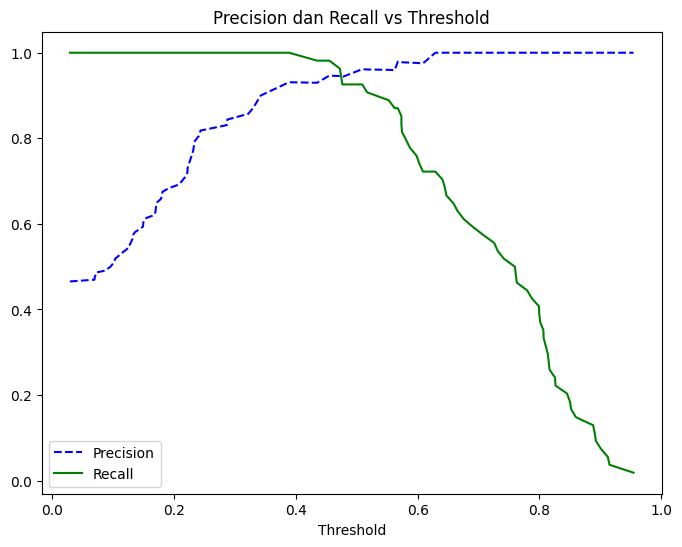

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report

# Probabilitas prediksi kelas positif (label=1)
probs = ensemble.predict_proba(X_test)[:, 1]

# Hitung precision, recall, dan threshold
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.title("Precision dan Recall vs Threshold")
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Hitung F1-score dari precision dan recall
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

# Cari threshold dengan F1 tertinggi
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Threshold terbaik berdasarkan F1-score: {optimal_threshold:.2f}")
print(f"F1-score tertinggi: {f1_scores[optimal_idx]:.2f}")

# Buat prediksi baru berdasarkan threshold ini
y_pred_optimal = (probs >= optimal_threshold).astype(int)

# Lihat classification report-nya
print("\nClassification Report dengan Threshold Optimal:")
print(classification_report(y_test, y_pred_optimal))


Threshold terbaik berdasarkan F1-score: 0.39
F1-score tertinggi: 0.96

Classification Report dengan Threshold Optimal:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        62
           1       0.93      1.00      0.96        54

    accuracy                           0.97       116
   macro avg       0.97      0.97      0.97       116
weighted avg       0.97      0.97      0.97       116



**Hasil Analisis**

Recall (garis hijau) tinggi di threshold rendah → model menangkap hampir semua data positif.

Precision (garis biru putus-putus) tinggi di threshold tinggi → model hanya memilih data yang sangat yakin positif.

Titik optimal (threshold = 0.39) adalah titik di mana F1-score (gabungan precision dan recall) tertinggi, yaitu 0.96.

Artinya di titik ini, model sudah cukup baik dalam menyeimbangkan ketepatan dan kelengkapan prediksinya.

**Precision (Presisi):**

Untuk label 0 (negatif) = 1.00 → Semua prediksi negatif benar, tidak ada kesalahan memprediksi negatif.

Untuk label 1 (positif) = 0.93 → 93% dari yang diprediksi positif benar-benar positif.

**Recall (Cakupan):**

Untuk label 0 (negatif) = 0.94 → Dari seluruh data negatif, 94% berhasil dikenali dengan benar.

Untuk label 1 (positif) = 1.00 → Semua data positif berhasil dikenali, tidak ada yang terlewat.

**F1-score:**

Kombinasi precision dan recall.

Skor sangat tinggi (0.96 dan 0.97) → Model sangat baik menangani kedua kelas.

Accuracy (Akurasi keseluruhan): 0.97 atau 97%

Dari 116 data, hanya sekitar 3 yang salah diklasifikasikan.

**Kesimpulan**

Threshold optimal 0.39 menghasilkan model dengan kinerja sangat baik dan seimbang.

**Model:**

Sangat akurat dalam mengenali ulasan negatif (tidak banyak false positive).

Sempurna dalam mengenali ulasan positif (tidak ada false negative).

F1-score tinggi (0.96) menunjukkan bahwa model ini cocok untuk tugas analisis sentimen karena presisi dan recall seimbang.

Sangat ideal untuk digunakan di platform e-commerce seperti Tokopedia, karena dapat memberikan pemahaman yang baik tentang kepuasan atau ketidakpuasan pelanggan.



##Prediksi ulasan baru

In [ ]:
# Fungsi prediksi baru
def prediksi_sentimen(teks):
    teks_bersih = clean_text(teks)
    tfidf_teks = tfidf.transform([teks_bersih])
    hasil = ensemble.predict(tfidf_teks)[0]
    return "Positif" if hasil == 1 else "Negatif"

# Contoh prediksi
print(prediksi_sentimen("Pengiriman cepat dan barang bagus banget!"))
print(prediksi_sentimen("Lubang baut tidak pas"))

Positif
Negatif
